<a href="https://colab.research.google.com/github/degallardo/mcd_tesina/blob/main/A_Path_Planning_Line_Segmentation_Algorithm_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-procesamiento de la imágen.
Para poder usar la imágen necesitamos aumentar el contraste y el grosor de la línea.

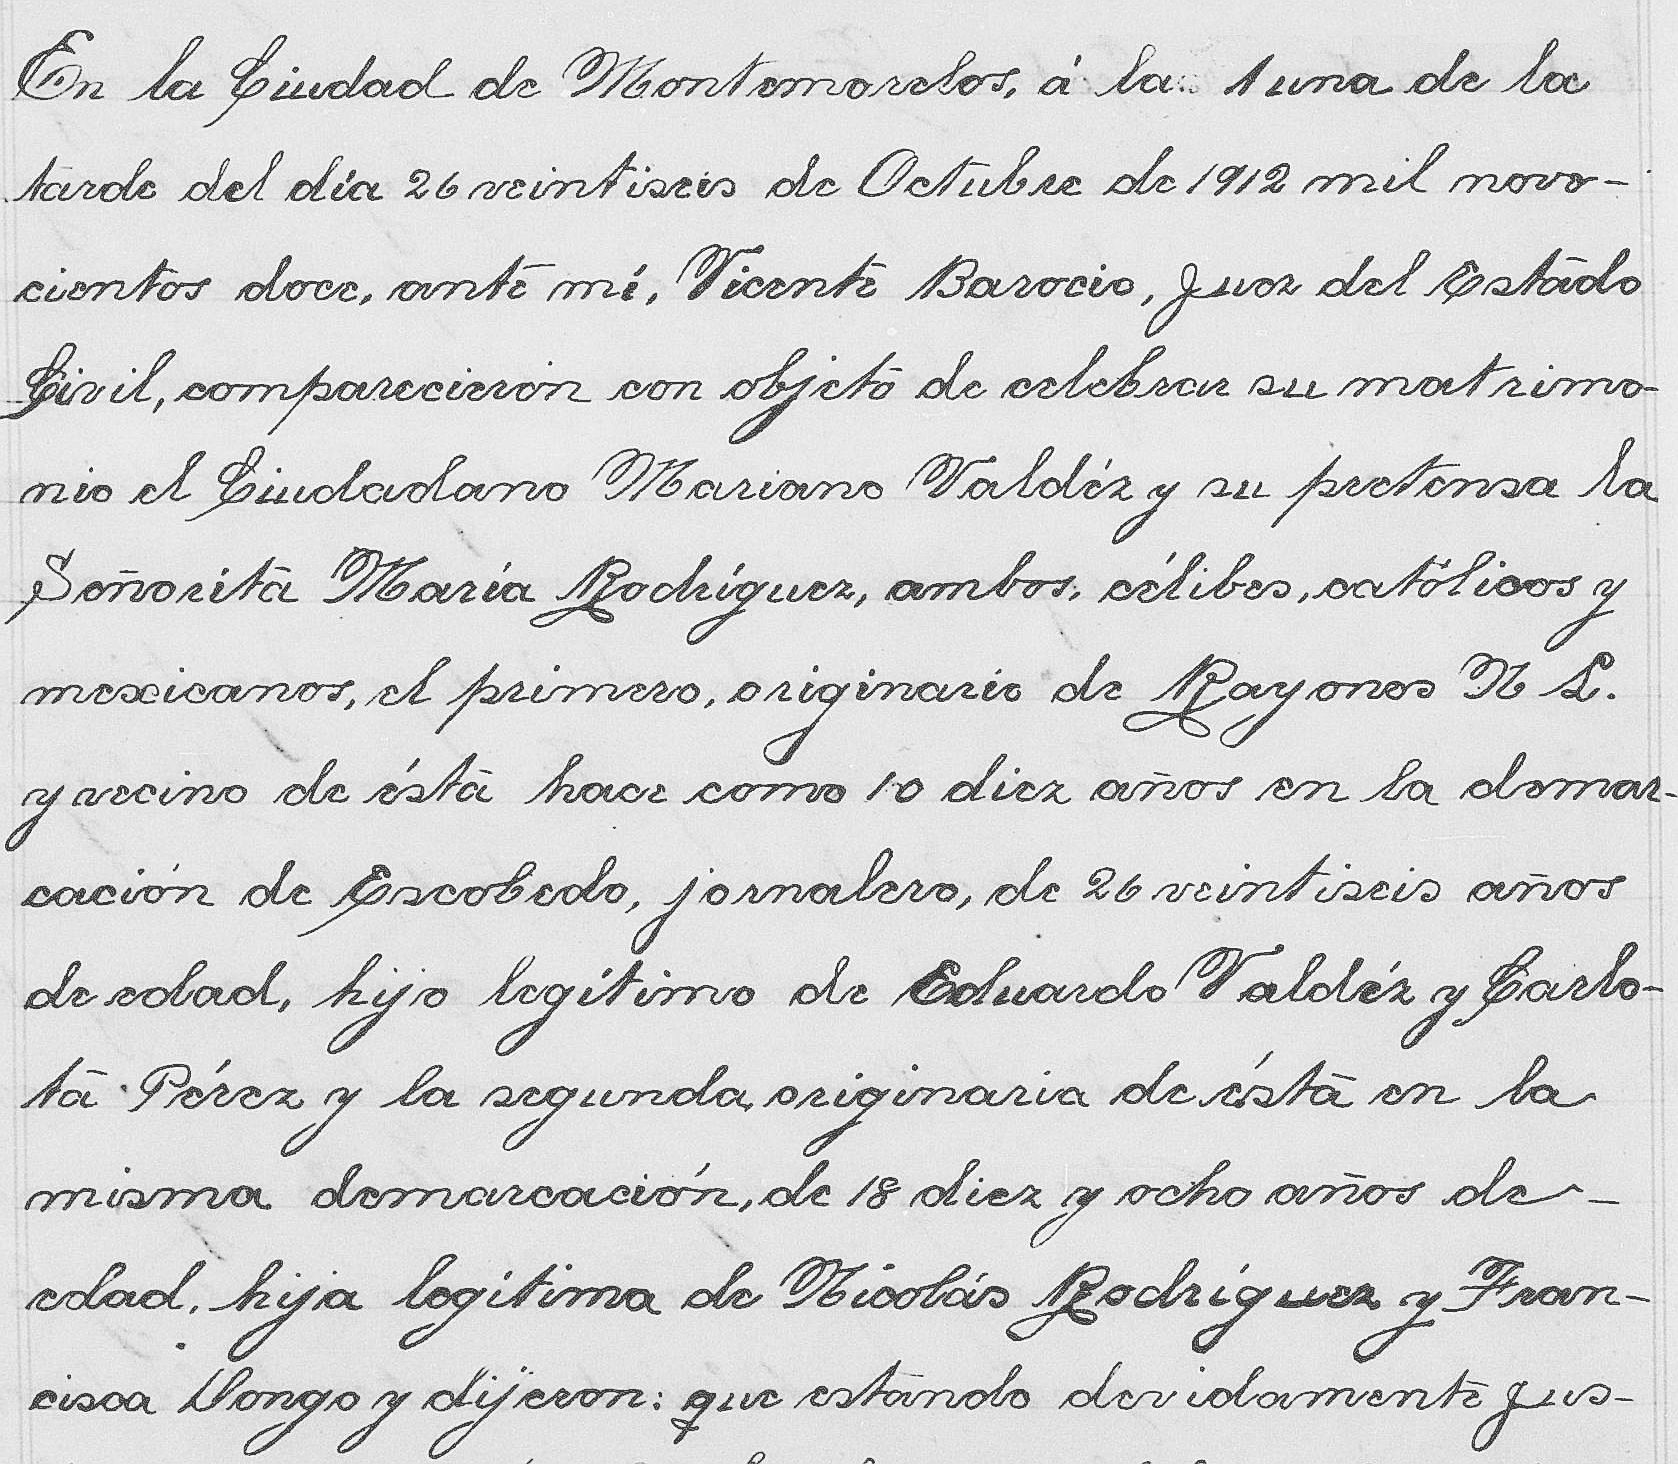

True

In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# read
img_cv = cv2.imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/366_1.jpg", cv2.IMREAD_GRAYSCALE)
# img_cv = cv2.imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/261a.jpg", cv2.IMREAD_GRAYSCALE) # <--
# img_cv = cv2.imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/234a.jpg", cv2.IMREAD_GRAYSCALE)
# img_cv = cv2.imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/390a.jpg", cv2.IMREAD_GRAYSCALE)
# img_cv = cv2.imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/TH-1942-22312-7217-59_X.jpg", cv2.IMREAD_GRAYSCALE)

# imgContrast = cv2.threshold(img_cv, 127, 255, cv2.THRESH_BINARY)

# increase contrast
pxmin = np.min(img_cv)
pxmax = np.max(img_cv)
imgContrast = (img_cv - pxmin) / (pxmax - pxmin) * 255

# increase line width
kernel = np.ones((3, 3), np.uint8)
imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)

# imgMorph = cv2.threshold(img_cv, 127, 255, cv2.THRESH_BINARY)

# Show
cv2_imshow(img_cv)

# write
cv2.imwrite('/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/hand_written.png', imgMorph)

<ipython-input-13-8bb7b5e4e336>:29: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/hand_written.png"))


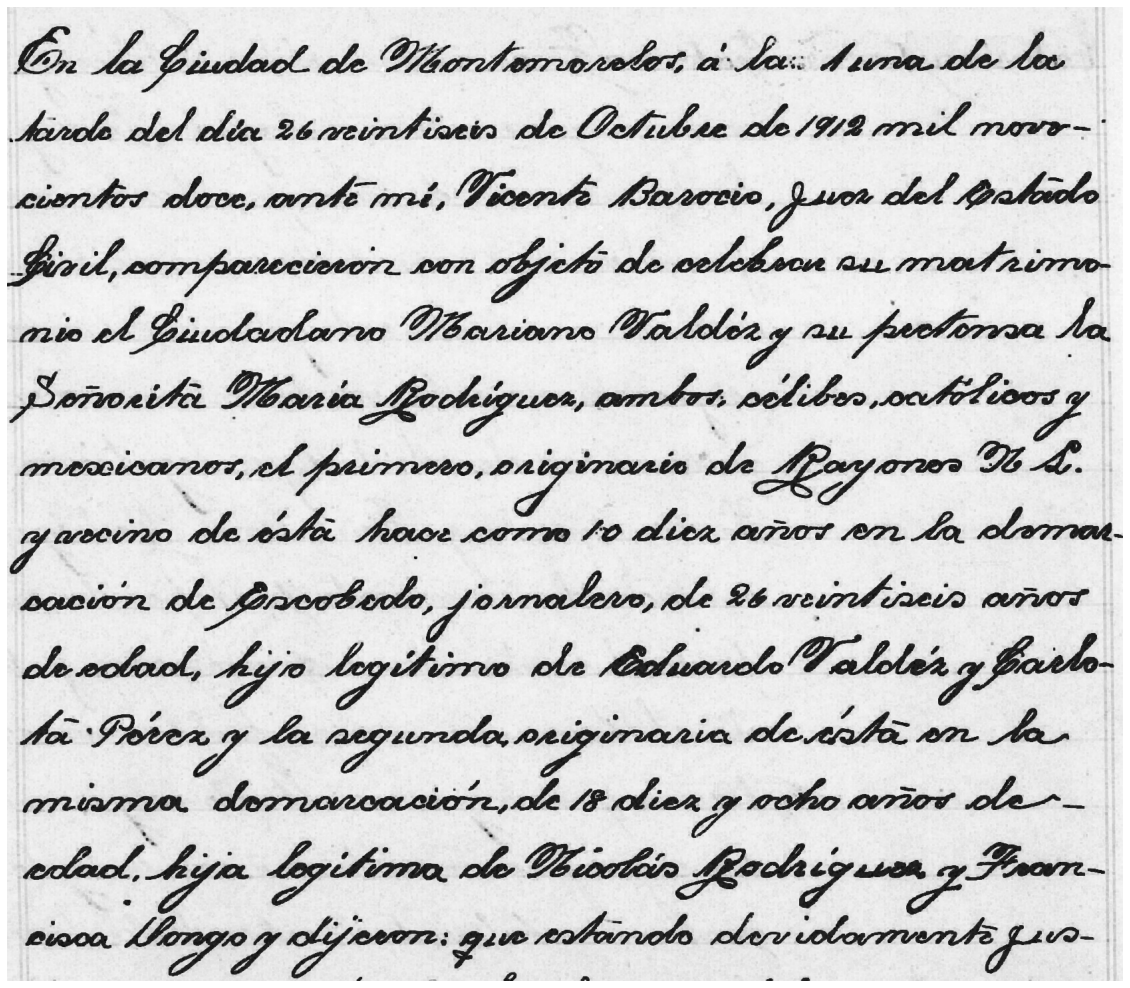

In [13]:
# https://github.com/muthuspark/line-segmentation-handwritten-doc/blob/73da591a194ce4833078b65e3843ab531ea2ab85/A*%20Path%20Planning%20Line%20Segmentation%20Algorithm.ipynb
# https://muthu.co/segmenting-lines-in-handwritten-documents-using-a-path-planning-algorithm/
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# img = rgb2gray(imread("7.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/394_.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/394.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/394a2.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/394b2.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/394b.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/233a.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/234a.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/256a.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/269_.jpg")) # <----
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/269a.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MatrimoniosMontemorelos1909-1912/269b.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten1.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten2.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten2b.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten6.png"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten7.png"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/02 (1)a11.jpg")) # <----
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/269_.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/366_1.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten3.png")) # <--- This is the one
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/out.png"))
img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/hand_written.png"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MontemorelosInformacionesMatrimoniales1891-1893/021a.jpg"))
# img = rgb2gray(imread("/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/MontemorelosInformacionesMatrimoniales1891-1893/021b.jpg"))

# img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

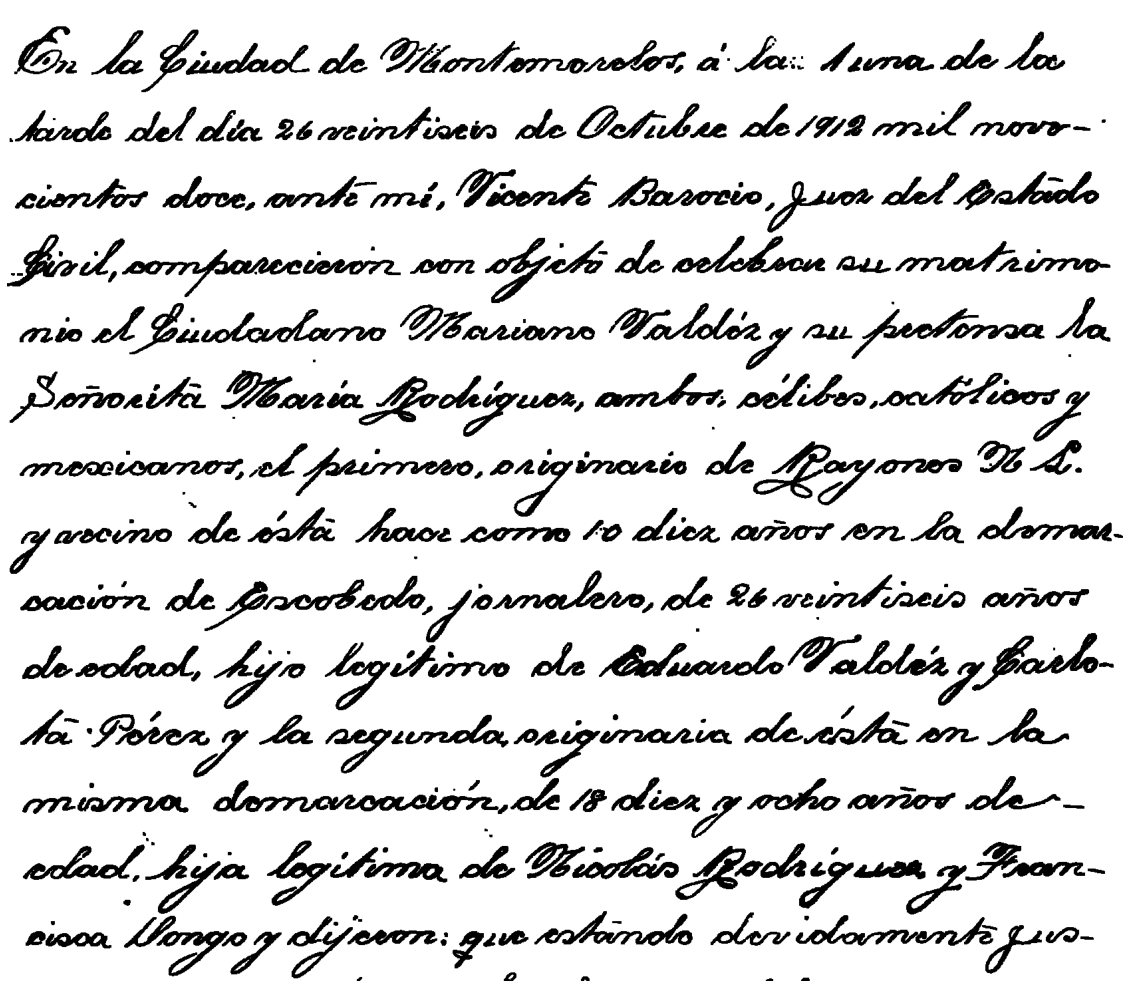

In [14]:
thresh1_img = cv2.imread('/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/hand_written.png',0)
ret,thresh1_img = cv2.threshold(thresh1_img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(thresh1_img, 'gray')

In [5]:
img = thresh1_img

### Encuentra el perfil de proyección horizontal y busca la ventana donde se puede crear el segmento de línea.
Una de las formas habituales de encontrar la altura de línea de un documento es analizando su perfil de proyección horizontal. El perfil de proyección horizontal (HPP) es la matriz de suma o filas de una imagen bidimensional. Donde hay más espacios en blanco vemos más picos. Estos picos nos dan una idea de dónde se puede realizar la segmentación entre dos líneas.

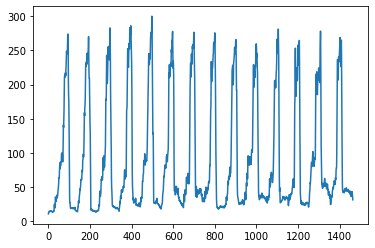

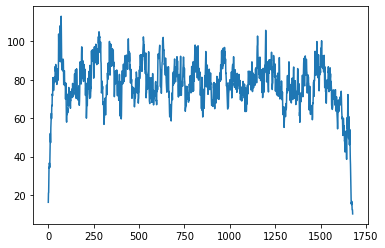

In [15]:
from skimage.filters import sobel
import numpy as np

def horizontal_projections(sobel_image):
    return np.sum(sobel_image, axis=1)  

def vertical_projections(sobel_image):
    return np.sum(sobel_image, axis=0)

sobel_image = sobel(img)
hpp = horizontal_projections(sobel_image)
plt.plot(hpp)
plt.show()
vpp = vertical_projections(sobel_image)
plt.plot(vpp)
plt.show()

Como puede ver, donde había más espacios en blanco hay picos en el gráfico. Usaremos esta información para ubicar las regiones donde podemos encontrar la línea de separación.

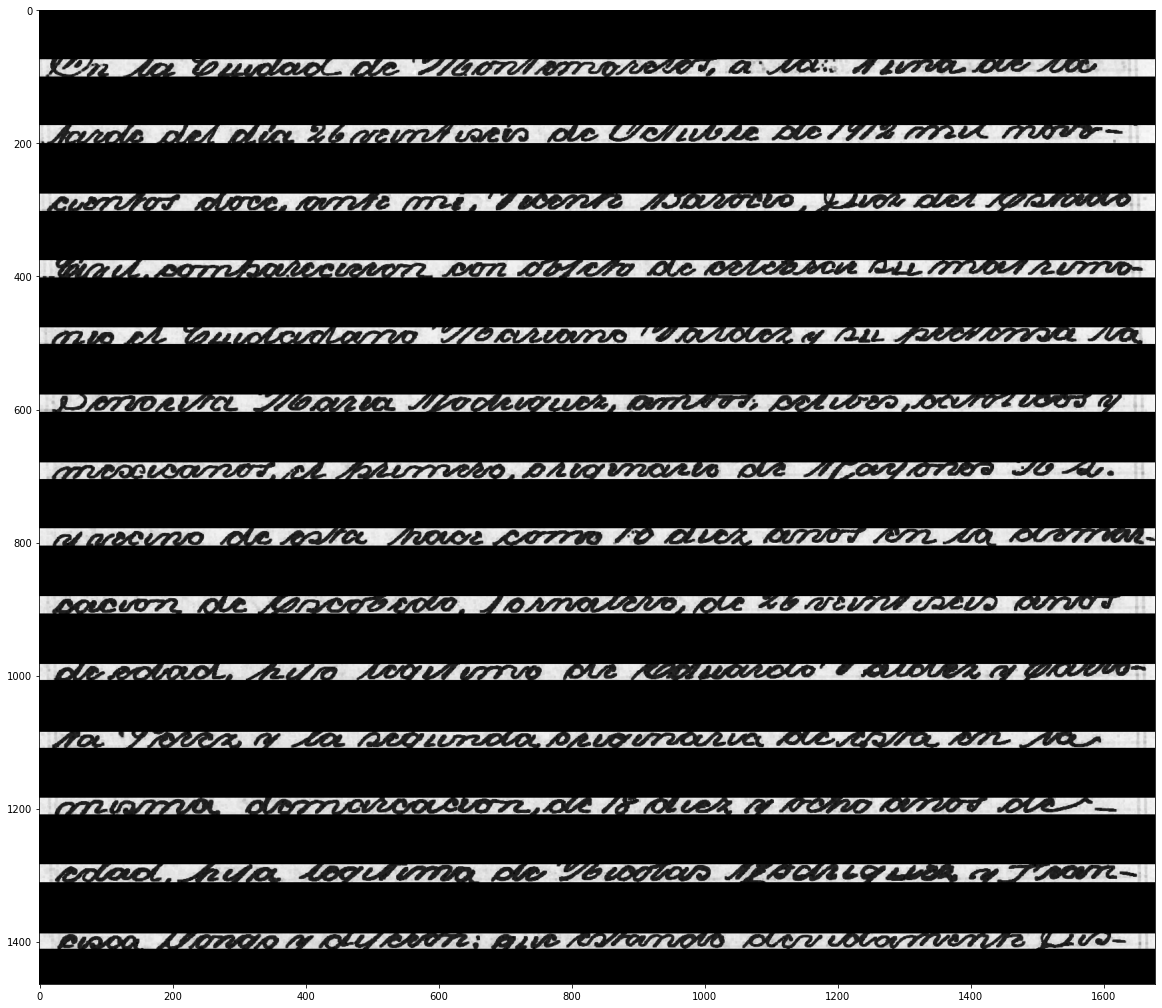

In [16]:
#find the midway where we can make a threshold and extract the peaks regions
#divider parameter value is used to threshold the peak values from non peak values.
def find_peak_regions(hpp, divider=2):
    threshold = (np.max(hpp)-np.min(hpp))/divider
    peaks = []
    peaks_index = []
    for i, hppv in enumerate(hpp):
        if hppv < threshold:
            peaks.append([i, hppv])
    return peaks

peaks = find_peak_regions(hpp)

peaks_index = np.array(peaks)[:,0].astype(int)

segmented_img = np.copy(img)
r,c = segmented_img.shape
for ri in range(r):
    if ri in peaks_index:
        segmented_img[ri, :] = 0
        
plt.figure(figsize=(20,20))
plt.imshow(segmented_img, cmap="gray")
plt.show()

Las regiones negras anteriores indican dónde necesitaríamos ejecutar nuestro algoritmo de planificación de rutas para la segmentación de líneas.

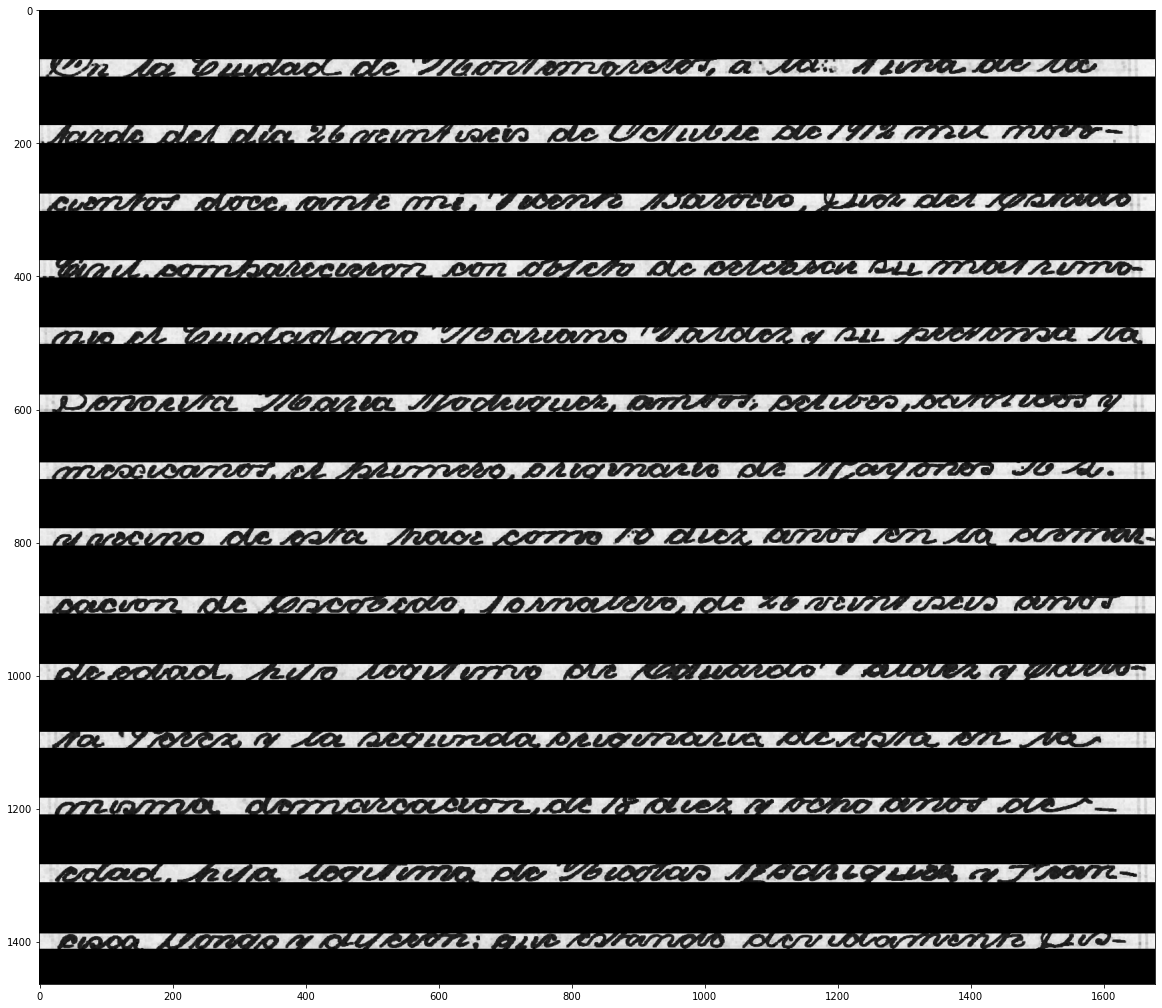

In [17]:
#find the midway where we can make a threshold and extract the peaks regions
#divider parameter value is used to threshold the peak values from non peak values.
def find_peak_regions(hpp, divider=2):
    threshold = (np.max(hpp)-np.min(hpp))/divider
    peaks = []
    peaks_index = []
    for i, hppv in enumerate(hpp):
        if hppv < threshold:
            peaks.append([i, hppv])
    return peaks

peaks = find_peak_regions(hpp)

peaks_index = np.array(peaks)[:,0].astype(int)

segmented_img = np.copy(img)
r,c = segmented_img.shape
for ri in range(r):
    if ri in peaks_index:
        segmented_img[ri, :] = 0
        
plt.figure(figsize=(20,20))
plt.imshow(segmented_img, cmap="gray")
plt.show()

Las regiones negras anteriores indican dónde necesitaríamos ejecutar nuestro algoritmo de planificación de rutas para la segmentación de líneas.

In [18]:
#group the peaks into walking windows
def get_hpp_walking_regions(peaks_index):
    hpp_clusters = []
    cluster = []
    for index, value in enumerate(peaks_index):
        cluster.append(value)

        if index < len(peaks_index)-1 and peaks_index[index+1] - value > 1:
            hpp_clusters.append(cluster)
            cluster = []

        #get the last cluster
        if index == len(peaks_index)-1:
            hpp_clusters.append(cluster)
            cluster = []
            
    return hpp_clusters

hpp_clusters = get_hpp_walking_regions(peaks_index)

In [19]:
#a star path planning algorithm 
from heapq import *

def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))
    
    while oheap:

        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))
                
    return []

In [20]:
#Scan the paths to see if there are any blockers.
from skimage.filters import threshold_otsu
from skimage.util import invert

def get_binary(img):
    mean = np.mean(img)
    if mean == 0.0 or mean == 1.0:
        return img

    thresh = threshold_otsu(img)
    binary = img <= thresh
    binary = binary*1
    return binary

def path_exists(window_image):
    #very basic check first then proceed to A* check
    if 0 in horizontal_projections(window_image):
        return True
    
    padded_window = np.zeros((window_image.shape[0],1))
    world_map = np.hstack((padded_window, np.hstack((window_image,padded_window)) ) )
    path = np.array(astar(world_map, (int(world_map.shape[0]/2), 0), (int(world_map.shape[0]/2), world_map.shape[1])))
    if len(path) > 0:
        return True
    
    return False

def get_road_block_regions(nmap):
    road_blocks = []
    needtobreak = False
    
    for col in range(nmap.shape[1]):
        start = col
        end = col+20
        if end > nmap.shape[1]-1:
            end = nmap.shape[1]-1
            needtobreak = True

        if path_exists(nmap[:, start:end]) == False:
            road_blocks.append(col)

        if needtobreak == True:
            break
            
    return road_blocks

def group_the_road_blocks(road_blocks):
    #group the road blocks
    road_blocks_cluster_groups = []
    road_blocks_cluster = []
    size = len(road_blocks)
    for index, value in enumerate(road_blocks):
        road_blocks_cluster.append(value)
        if index < size-1 and (road_blocks[index+1] - road_blocks[index]) > 1:
            road_blocks_cluster_groups.append([road_blocks_cluster[0], road_blocks_cluster[len(road_blocks_cluster)-1]])
            road_blocks_cluster = []

        if index == size-1 and len(road_blocks_cluster) > 0:
            road_blocks_cluster_groups.append([road_blocks_cluster[0], road_blocks_cluster[len(road_blocks_cluster)-1]])
            road_blocks_cluster = []

    return road_blocks_cluster_groups

binary_image = get_binary(img)

for cluster_of_interest in hpp_clusters:
    nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
    road_blocks = get_road_block_regions(nmap)
    road_blocks_cluster_groups = group_the_road_blocks(road_blocks)
    #create the doorways
    for index, road_blocks in enumerate(road_blocks_cluster_groups):
        window_image = nmap[:, road_blocks[0]: road_blocks[1]+10]
        binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:][:, road_blocks[0]: road_blocks[1]+10][int(window_image.shape[0]/2),:] *= 0

In [ ]:
road_blocks

[]

In [ ]:
index

In [ ]:
cluster_of_interest

In [21]:
#now that everything is cleaner, its time to segment all the lines using the A* algorithm
line_segments = []
for i, cluster_of_interest in enumerate(hpp_clusters):
    nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
    path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2),nmap.shape[1]-1)))
    offset_from_top = cluster_of_interest[0]
    path[:,0] += offset_from_top
    line_segments.append(path)

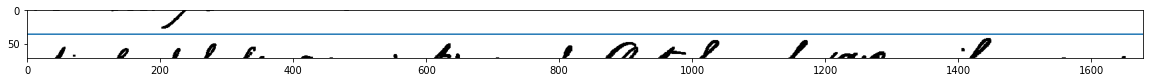

In [22]:
cluster_of_interest = hpp_clusters[1]
offset_from_top = cluster_of_interest[0]
nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
plt.figure(figsize=(20,20))
plt.imshow(invert(nmap), cmap="gray")

path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2),nmap.shape[1]-1)))
plt.plot(path[:,1], path[:,0])

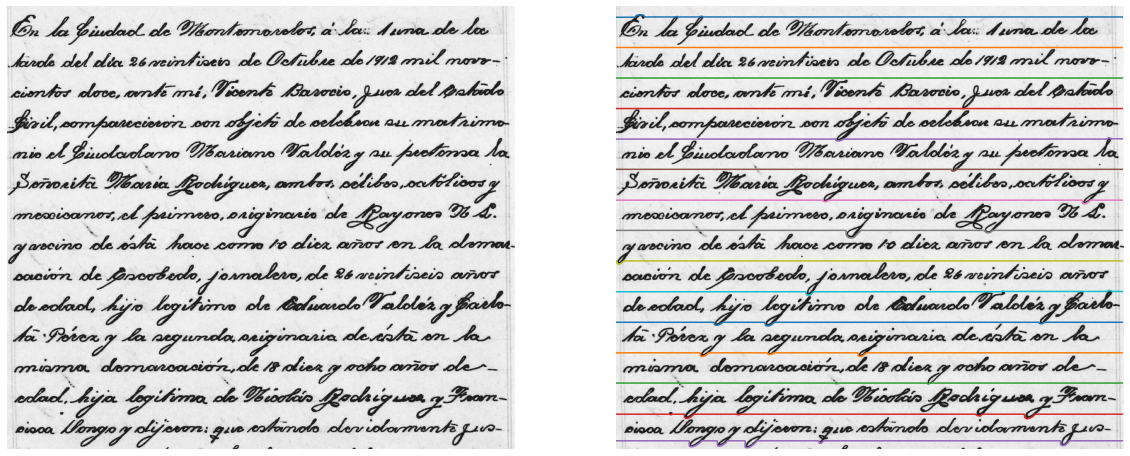

In [23]:
offset_from_top = cluster_of_interest[0]
fig, ax = plt.subplots(figsize=(20,10), ncols=2)
for path in line_segments:
    ax[1].plot((path[:,1]), path[:,0])
ax[1].axis("off")
ax[0].axis("off")
ax[1].imshow(img, cmap="gray")
ax[0].imshow(img, cmap="gray")

In [24]:
## add an extra line to the line segments array which represents the last bottom row on the image
last_bottom_row = np.flip(np.column_stack(((np.ones((img.shape[1],))*img.shape[0]), np.arange(img.shape[1]))).astype(int), axis=0)
line_segments.append(last_bottom_row)

### Vamos a dividir la imagen ahora por los segmentos de línea que pasan a través de la imagen.

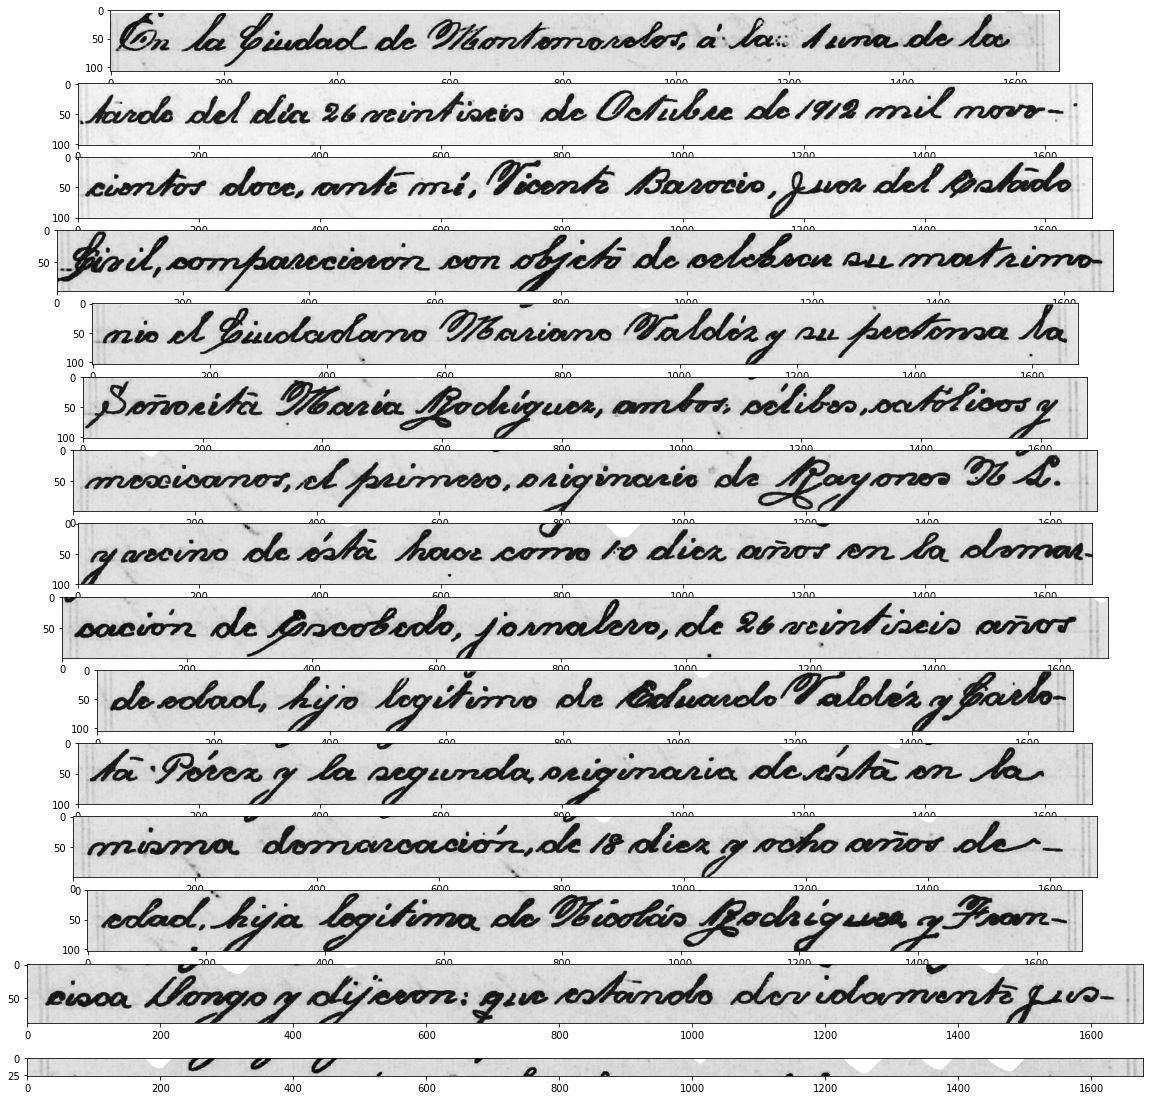

In [25]:
line_images = []
def extract_line_from_image(image, lower_line, upper_line):
    lower_boundary = np.min(lower_line[:, 0])
    upper_boundary = np.min(upper_line[:, 0])
    img_copy = np.copy(image)
    r, c = img_copy.shape
    for index in range(c-1):
        img_copy[0:lower_line[index, 0], index] = 255
        img_copy[upper_line[index, 0]:r, index] = 255
    
    return img_copy[lower_boundary:upper_boundary, :]

line_count = len(line_segments)
fig, ax = plt.subplots(figsize=(20,20), nrows=line_count-1)
for line_index in range(line_count-1):
    line_image = extract_line_from_image(img, line_segments[line_index], line_segments[line_index+1])
    plt.imsave('/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/lines/line'+ str(line_index) + '.jpg', line_image, cmap="gray")
    line_images.append(line_image)
    ax[line_index].imshow(line_image, cmap="gray")


### Qhora que tengo las líneas, ahora puedo dividir estas líneas en palabras.

Ref: https://github.com/muthuspark/ml_research/blob/master/Separate%20words%20in%20a%20line%20using%20VPP.ipynb

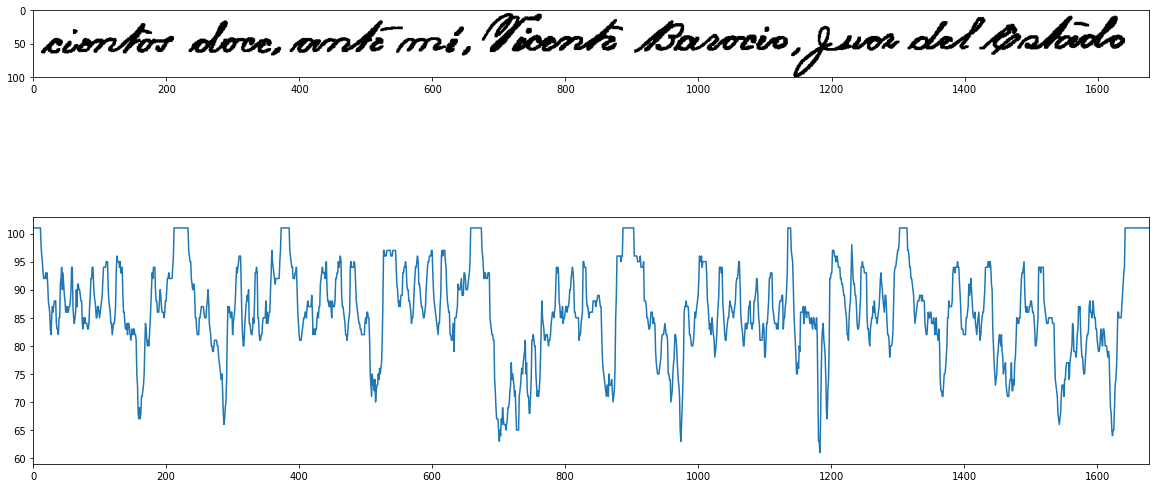

In [26]:
from skimage.filters import threshold_otsu

#binarize the image, guassian blur will remove any noise in the image
first_line = line_images[2]
thresh = threshold_otsu(first_line)
binary = first_line > thresh

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

In [27]:
height = first_line.shape[0]

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
for vp in vertical_projection:
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
        whitespace = 0 # reset whitepsace counter. 

print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

whitespaces: [12, 22, 13, 17, 17, 5, 12]
average whitespace lenght: 14.0


In [28]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > avg_white_space_length:
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
            
print(divider_indexes)

[217, 660, 896, 1307]


In [29]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))

In [30]:
import os
# Limpiamos el folder para guardar las nuevas imágenes
words_path = '/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/words'
for root, dirs, files in os.walk(words_path, topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
        # print(os.path.join(root, name))
    # for name in dirs:
        # os.rmdir(os.path.join(root, name))
        # print(os.path.join(root, name))


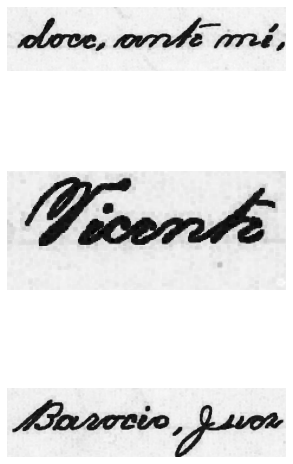

In [31]:
# now plot the findings
words_imgs = []
fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")
    word_filename = words_path + '/word' + str(index) + '.png'
    plt.imsave(word_filename, first_line[:,window[0]:window[1]], cmap="gray")
    words_imgs.append(word_filename)


In [32]:
x_loc = window[0]
width = window[1] - window[0]
print('X: {}, Width: {}, Line index: '.format(x_loc, width))

X: 896, Width: 411, Line index: 


['/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/words/word0.png',
 '/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/words/word1.png',
 '/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/words/word2.png']

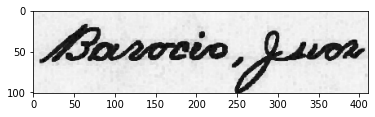

In [33]:
plt.imshow(first_line[:,window[0]:window[1]], cmap="gray")
words_imgs

In [34]:
words_input = input('Captura las palabras separadas por coma:')
print(words_input)

Captura las palabras separadas por coma:Barocio, juez
Barocio, juez


### Creación del dataset para entrenar el modelo.
Esta función crea los pares de imágenes y texto que se necesitan para entrenar el modelo de reconocimiento de palabras.

In [35]:
!pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# import os
import numpy as np
import cv2

In [37]:
class DataProvider():
	"this class creates machine-written text for a word list. TODO: change getNext() to return your samples."

	def __init__(self, wordList, imgList):
		self.wordList = wordList
		self.imgList = imgList
		self.idx = 0

	def hasNext(self):
		"are there still samples to process?"
		return self.idx < len(self.wordList)

	def getNext(self):
		"TODO: return a sample from your data as a tuple containing the text and the image"
		# img = np.ones((32, 128), np.uint8)*255
		img = cv2.imread(self.imgList[self.idx])
		word = self.wordList[self.idx]
		self.idx += 1
		# cv2.putText(img, word, (2,20), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0), 1, cv2.LINE_AA)
		return (word, img)


def createIAMCompatibleDataset(dataProvider):
	"this function converts the passed dataset to an IAM compatible dataset"

	# create files and directories
	f = open('/content/drive/MyDrive/MCD/AA/SimpleHTR/train2/words.txt', 'w+')
	if not os.path.exists('sub'):
		os.makedirs('sub')
	if not os.path.exists('/content/drive/MyDrive/MCD/AA/SimpleHTR/train2/sub/sub-sub'):
		os.makedirs('/content/drive/MyDrive/MCD/AA/SimpleHTR/train2/sub/sub-sub')

	# go through data and convert it to IAM format
	ctr = 0
	while dataProvider.hasNext():
		sample = dataProvider.getNext()
		
		# write img
		cv2.imwrite('/content/drive/MyDrive/MCD/AA/SimpleHTR/train2/sub/sub-sub/sub-sub-%d.png'%ctr, sample[1])
		
		# write filename, dummy-values and text
		line = 'sub-sub-%d'%ctr + ' X X X X X X X ' + sample[0] + '\n'
		f.write(line)
		
		ctr += 1
		
		
# words = ['some', 'words', 'for', 'which', 'we', 'create', 'text-images']
words = words_input.split(',')
dataProvider = DataProvider(words, words_imgs)
createIAMCompatibleDataset(dataProvider)



# Prueba de reconocimiento de texto con OCR.

In [38]:
!pip install Pillow
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [39]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,964 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [40]:
!sudo apt-get install libicu-dev libpango1.0-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libicu-dev is already the newest version (66.1-2ubuntu2.1).
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libdatrie-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol1-dev libthai-dev libxcb-render0-dev libxcb-shm0-dev
  pango1.0-tools
Suggested packages:
  libcairo2-doc libdatrie-doc libgirepository1.0-dev libglib2.0-doc
  libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
  imagemagick libpango1.0-doc libthai-doc
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libdatrie-dev libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin
  libgraphite2-dev libharfbuzz-dev libharfbuzz-gobj

In [41]:
!./configure --disable-graphics

/bin/bash: ./configure: No such file or directory


In [42]:
!rm /usr/share/tesseract-ocr/4.00/tessdata/spa*
# !rm /usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata.1
!ls "/usr/share/tesseract-ocr/4.00/tessdata/"
# !ls "/usr/share/tesseract-ocr/4.00/tessdata/tessconfigs/batch"

rm: cannot remove '/usr/share/tesseract-ocr/4.00/tessdata/spa*': No such file or directory
configs  eng.traineddata  osd.traineddata  pdf.ttf  tessconfigs


In [43]:
# Regular
!wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata/blob/4767ea922bcc460e70b87b1d303ebdfed0897da8/spa.traineddata

--2023-02-01 00:13:21--  https://github.com/tesseract-ocr/tessdata/blob/4767ea922bcc460e70b87b1d303ebdfed0897da8/spa.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata’

spa.traineddata         [ <=>                ] 135.14K   738KB/s    in 0.2s    

2023-02-01 00:13:21 (738 KB/s) - ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata’ saved [138383]



In [44]:
# Fast
!wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata_fast/blob/65727574dfcd264acbb0c3e07860e4e9e9b22185/spa.traineddata

--2023-02-01 00:13:28--  https://github.com/tesseract-ocr/tessdata_fast/blob/65727574dfcd264acbb0c3e07860e4e9e9b22185/spa.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata.1’

spa.traineddata.1       [ <=>                ] 133.69K   726KB/s    in 0.2s    

2023-02-01 00:13:29 (726 KB/s) - ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata.1’ saved [136896]



In [45]:
# Best
!wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata_best/blob/e2aad9b983032bb1beff9133104a67cdbb87ca4d/spa.traineddata

--2023-02-01 00:13:34--  https://github.com/tesseract-ocr/tessdata_best/blob/e2aad9b983032bb1beff9133104a67cdbb87ca4d/spa.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata.2’

spa.traineddata.2       [ <=>                ] 133.66K   727KB/s    in 0.2s    

2023-02-01 00:13:35 (727 KB/s) - ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata.2’ saved [136866]



In [46]:
# Best
!wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata_best/blob/e2aad9b983032bb1beff9133104a67cdbb87ca4d/spa_old.traineddata

--2023-02-01 00:13:38--  https://github.com/tesseract-ocr/tessdata_best/blob/e2aad9b983032bb1beff9133104a67cdbb87ca4d/spa_old.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/spa_old.traineddata’

spa_old.traineddata     [ <=>                ] 133.75K   723KB/s    in 0.2s    

2023-02-01 00:13:38 (723 KB/s) - ‘/usr/share/tesseract-ocr/4.00/tessdata/spa_old.traineddata’ saved [136962]



In [50]:
from google.colab import files
uploaded = files.upload()

In [51]:
image_path = 'SE_Label_01.png'
# image_path = 'SE_Label_01 (1).png'

In [47]:
!ls "/usr/share/tesseract-ocr/4.00/tessdata/"
!cp "spa.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata/"
!cp "spa_old.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata/"
!ls "/usr/share/tesseract-ocr/4.00/tessdata/"

configs		 pdf.ttf	      spa.traineddata.1
eng.traineddata  spa_old.traineddata  spa.traineddata.2
osd.traineddata  spa.traineddata      tessconfigs
cp: cannot stat 'spa.traineddata': No such file or directory
cp: cannot stat 'spa_old.traineddata': No such file or directory
configs		 pdf.ttf	      spa.traineddata.1
eng.traineddata  spa_old.traineddata  spa.traineddata.2
osd.traineddata  spa.traineddata      tessconfigs


In [48]:
!ls "/usr/share/tesseract-ocr/4.00/tessdata/"

configs		 pdf.ttf	      spa.traineddata.1
eng.traineddata  spa_old.traineddata  spa.traineddata.2
osd.traineddata  spa.traineddata      tessconfigs


TesseractError: ignored

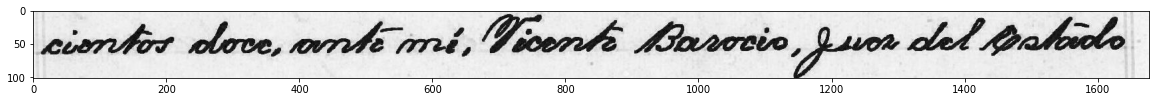

In [55]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
#  import Image

# try:
#     from PIL import Image
# except ImportError:
#     import Image
# import pytesseract

  def ocr_core(filename):
      """
      This function will handle the core OCR processing of images.
      """
      text = pytesseract.image_to_string(Image.open(filename), lang='spa')  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
      return text

image_path = '/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/lines/line2.jpg'

# print(ocr_core('images/ocr_example_1.png'))
plt.figure(figsize = (20,2))
plt.imshow(plt.imread(image_path))
print(ocr_core(image_path))

# Get bounding box estimates
# print(pytesseract.image_to_boxes(Image.open(image_path)))

In [56]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 17.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [57]:
import easyocr

reader = easyocr.Reader(['es', 'en'])

ImportError: ignored

In [ ]:
# result = reader.readtext('/content/drive/MyDrive/MCD/AA/LineSegmentation/DataSets/examples/handwritten7.png', detail=0, paragraph=True)
result = reader.readtext('testo02.png', detail=0, paragraph=True)

NameError: ignored

In [ ]:
result

NameError: ignored